# Práctica 3: Regresión logística multi-clase y redes neuronales

Alumnos: Andrés Ruiz Bartolomé y Adrián de Lucas Gómez  

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
from scipy.io import loadmat

# Parte 1: Regresión logística multi-clase

Es esta primera parte trataremos de reconocer numeros escritos a mano usando la regresion logística pero esta vez multiclase. Esto se debe a que el resultado no es binario y se pueden dar mas resultados posibles.
Para empezar traeremos de fichero los datos y mostraremos en pantalla una secuencia aleatoria de numeros sacados de la imagen de muestra. 

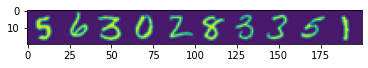

Se ha clasificado correctamente el 96.02% de los ejemplos de entrenamiento


In [11]:
def Parte1():
    data= loadmat('ex3data1.mat')

    y= data['y']
    X = data['X']

    sample = np.random.choice(X.shape[0], 10)
    plt.imshow(X[sample, :].reshape(-1, 20).T)
    
    Theta = oneVsAll(X, y, 10, 0.1)
    XStacked = np.hstack([np.ones((len(y), 1)),X])
    plt.show()

    print('Se ha clasificado correctamente el ', end='')
    print("%.2f" %(precision(XStacked, y.ravel(), Theta)*100), end='')
    print('% de los ejemplos de entrenamiento')

    

Parte1()

Para calcular el reconocimiento de los dígitos implementaremos la funcion **OneVsAll** la cual entrena y devuelve los mejores valores de Theta para cada etiqueta (para reconocer cada número).

Cuando la función ya está entrenada podemos medir el grado de precisión que tiene haciendo que evalue casos de prueba que le damos en la función **prescision**

In [7]:
def oneVsAll(X, y, num_etiquetas, reg):
    
    X_stacked = np.hstack([np.ones((len(y),1)), X])

    ret = np.zeros([num_etiquetas, len(X_stacked[0])])

    for etiqueta in range(num_etiquetas):
        labels = ((y== etiqueta + 1 )* 1 ).ravel()#conseguimos un array de booleanos en la etiqueta que nos iteresa y luego los convertimos a unos 
        ret[etiqueta] = opt.fmin_tnc(func = costeRegularizado, x0 = ret[etiqueta], 
        fprime=gradienteRegularizado,args=(X_stacked,labels,reg))[0]
    
    return ret

def precision(X, Y, Theta):
    n = len(Y)
    predicciones = np.empty(n)
    for i in range(n):
        predicciones[i] = (np.argmax(sigmoide(np.dot(X[i], Theta.T)))+1)
    return np.mean(Y == predicciones)


Para el calculo de los valores de theta usaremos de nuevo la funcion **opt.fmin_tnc** usando el gradienteRegularizado y el costeRegularizado. La mayoria de funciones son iguales a la version de regresión logística de la Practica2. Ahora en el **coste** para evitar hacer un logaritmo de 0 añadimos un 1e-6 para asi evitar errores.

In [9]:
def sigmoide(x):
    ## cuidado con x > 50 devuelve 1
    ##
    s = 1 / (1 + np.exp(-x))
    return s

#---------------------------------------------------------------------------------------------------

def coste(theta, X, Y):

	H = sigmoide(np.matmul(X, theta))

	cost = (-1/(len(X))) * (np.dot(np.log(H), Y) +
							np.dot(np.log(1 - H + 1e-6), (1 - Y)))

	return cost


def costeRegularizado(theta, X, Y, lambo):
	m = np.shape(X)[0]
	return coste(theta, X, Y ) + lambo * np.sum(theta**2)/(2*m)


def gradiente(theta, x, y):
    H = sigmoide(np.dot(x, theta))
    return np.dot((H - y), x) / len(y)


def gradienteRegularizado(theta,X, Y, lambo):
	grad = (gradiente(theta,X, Y))
	a = grad[0]
	reg = lambo*theta / len(Y)
	reg[0] = a
	return grad + reg 

#---------------------------------------------------------------------------------------------------


# Parte 2: Redes neuronales

En esta parte usamos los pesos de una red neuronal ya entrenada, con el objetivo de evaluar su precisión. Para ello calculamos primero la activación de la capa oculta multiplicando el resultado de la capa anterior (en este caso XT al ser la capa de entrada) por los pesos de la capa actual, luego se le añade el término independiente y se continúa la propagación hacia delante. Al llegar a la última capa (la de salida) el resultado son valores entre 0 y 1 con la confianza de que ese ejemplo concreto corresponde a esa clase particular. El valor más alto significa, por lo tanto, una mayor confianza.
Por último realizamos el cálculo de que porcentaje de los casos son predichos adecuadamente.

In [12]:
def precisionRedNeuronal(Y, finalActv):
    n = len(Y)
    predicciones = np.empty(n)
    for i in range(n):
        predicciones[i] = (np.argmax(finalActv[:,i])+1)
    return np.mean(Y.ravel() == predicciones)

In [13]:
def redNeuronal(X, Y):
    pesos = loadmat('ex3weights.mat')
    theta1 = pesos ['Theta1']
    theta2 = pesos ['Theta2']

    hl2 = theta1.dot(X.T)   #Capa oculta
    act2 = sigmoide(hl2)    #Activación

    act2 = np.vstack([np.ones((len(act2[0]))), act2])

    ol = theta2.dot(act2)   #Capa de salida
    act3 = sigmoide(ol)
    
    print("La red neuronal clasifica correctamente el ", end='')
    print(precisionRedNeuronal(Y, act3) * 100, end='')
    print("% de los casos.")

In [14]:
def Parte2():
    data= loadmat('ex3data1.mat')

    y= data['y']
    X = data['X']
    
    XStacked = np.hstack([np.ones((len(y), 1)),X])
    
    redNeuronal(XStacked, y)

Parte2()

La red neuronal clasifica correctamente el 97.52% de los casos.
